In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [5]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [11]:
y_train.shape


(50000, 1)

In [12]:
y_train[:5]


array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [14]:
y_test = y_test.reshape(-1,)


In [15]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [16]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

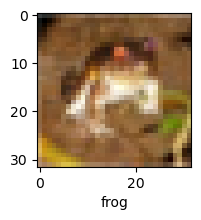

In [17]:
plot_sample(X_train, y_train, 0)

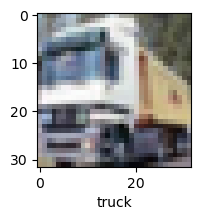

In [18]:
plot_sample(X_train, y_train, 1)

In [ ]:
#NORMALIZING THE TRAINING DATA

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#BUILDING SIMPLE ANN FOR IMAGE CLASSIFICATION

In [9]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=20)

Epoch 1/20
 133/1563 [=>............................] - ETA: 26s - loss: 2.0914 - accuracy: 0.2286

KeyboardInterrupt: 

In [23]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 6ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.52      0.59      1000
           1       0.70      0.62      0.66      1000
           2       0.45      0.44      0.44      1000
           3       0.40      0.25      0.31      1000
           4       0.55      0.41      0.47      1000
           5       0.45      0.42      0.43      1000
           6       0.50      0.76      0.60      1000
           7       0.59      0.68      0.63      1000
           8       0.51      0.81      0.62      1000
           9       0.67      0.54      0.60      1000

    accuracy                           0.54     10000
   macro avg       0.55      0.54      0.54     10000
weighted avg       0.55      0.54      0.54     10000



In [ ]:
#CNN TO TRAIN OUR IMAGES TO GET THE BEST RESULTS

In [25]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [26]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.4382 - accuracy: 0.4832
Epoch 2/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1001 - accuracy: 0.6151
Epoch 3/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9805 - accuracy: 0.6592
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8996 - accuracy: 0.6872
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8332 - accuracy: 0.7088
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7827 - accuracy: 0.7283
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7326 - accuracy: 0.7451
Epoch 8/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6957 - accuracy: 0.7584
Epoch 9/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6502 - accuracy: 0.7733
Epoch 10/10
1563/1563 [==============================] - 23s 15m

In [28]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9126 - accuracy: 0.7044


[0.9126192331314087, 0.7044000029563904]

In [10]:
# Adding Dropout and Batch Normalization
cnn2 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    
    layers.Dense(10, activation='softmax')
])


In [11]:
cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
cnn2.fit(X_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 48s 31ms/step - loss: 1.5918 - accuracy: 0.4219
Epoch 2/50
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1581 - accuracy: 0.5958
Epoch 3/50
1563/1563 [==============================] - 46s 29ms/step - loss: 0.9857 - accuracy: 0.6610
Epoch 4/50
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8887 - accuracy: 0.6973
Epoch 5/50
1563/1563 [==============================] - 46s 30ms/step - loss: 0.8106 - accuracy: 0.7237
Epoch 6/50
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7592 - accuracy: 0.7433
Epoch 7/50
1563/1563 [==============================] - 45s 29ms/step - loss: 0.7057 - accuracy: 0.7611
Epoch 8/50
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6639 - accuracy: 0.7764
Epoch 9/50
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6307 - accuracy: 0.7863
Epoch 10/50
1563/1563 [==============================] - 48s 31m

In [33]:
cnn2.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.8683 - accuracy: 0.7198


[0.8682858347892761, 0.7197999954223633]

In [34]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[0.0991917 , 0.10672756, 0.09864161, 0.09624568, 0.0951129 ,
        0.10185363, 0.10310881, 0.10028276, 0.10122196, 0.09761339],
       [0.09916729, 0.10909541, 0.09814629, 0.09463606, 0.09424783,
        0.10280849, 0.10418338, 0.09959365, 0.10069458, 0.09742703],
       [0.09900658, 0.10646055, 0.09800363, 0.0954047 , 0.09583186,
        0.10249096, 0.10408121, 0.10013757, 0.10100913, 0.09757392],
       [0.09863643, 0.10792381, 0.0982411 , 0.09507326, 0.09491506,
        0.10262873, 0.10362249, 0.09978422, 0.10136956, 0.09780524],
       [0.0996948 , 0.10560066, 0.09921971, 0.09680517, 0.09608936,
        0.10135288, 0.10248546, 0.10006577, 0.1005282 , 0.098158  ]],
      dtype=float32)

In [35]:
y_pred = cnn2.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 6ms/step


array([[1.0224405e-02, 3.4378309e-02, 2.9277308e-02, 4.3946591e-01,
        1.2460531e-03, 2.6436038e-02, 4.1220623e-01, 8.1018376e-04,
        2.5682850e-02, 2.0272657e-02],
       [3.3762634e-03, 5.0279967e-02, 7.2925404e-06, 3.7426398e-06,
        3.5479823e-07, 6.2322982e-07, 2.7892398e-07, 7.3031850e-07,
        9.4596010e-01, 3.7058265e-04],
       [7.4953060e-03, 8.3578313e-03, 3.8607632e-05, 1.3317422e-05,
        5.4640799e-07, 5.3234538e-07, 3.5470035e-07, 1.2982048e-06,
        9.8312759e-01, 9.6462859e-04],
       [6.8211043e-01, 8.1670515e-02, 8.5661169e-03, 1.4316306e-03,
        4.3569817e-04, 2.8404169e-04, 5.0390847e-03, 4.7241850e-04,
        9.1242671e-02, 1.2874733e-01],
       [8.7438430e-08, 6.1206592e-08, 6.2401470e-04, 2.2534490e-05,
        1.2882756e-05, 1.7899329e-07, 9.9934000e-01, 1.3587967e-09,
        2.4670962e-07, 3.4520077e-08]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

In [ ]:
y_test[:5]

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]


In [ ]:
classes[y_classes[3]]


In [55]:
cnn = models.Sequential([
    # Layer 1: Conv2D + BatchNorm
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.BatchNormalization(),
    
    # Layer 2: Conv2D + BatchNorm
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),  # Dropout for regularization
    
    # Layer 3: Conv2D + BatchNorm
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    
    # Layer 4: Conv2D + BatchNorm
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    # Layer 5: Conv2D + BatchNorm
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    
    # Layer 6: Conv2D + BatchNorm
    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    
    # Flattening the layers
    layers.Flatten(),
    
    # Fully connected layer
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),  # Dropout for regularization
    
    # Output layer
    layers.Dense(10, activation='softmax')
])

# Compile the model
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks: Early stopping and reducing learning rate on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train the model with data augmentation
history = cnn.fit(datagen.flow(x_train, y_train, batch_size=64),
                  epochs=100, validation_data=(x_test, y_test),
                  callbacks=[early_stopping, reduce_lr])
Key Changes:
Deeper Architecture:

Added more convolutional layers (64, 128, 256 filters) with Batch Normalization after each one for faster convergence and better generalization.
Dropout:

Dropout is applied after each pooling layer and dense layer to avoid overfitting. The dropout rates are tuned to 0.25 and 0.5.
L2 Regularization:

The dense layer has an L2 regularizer to control overfitting.
Learning Rate Scheduler:

A learning rate scheduler (ReduceLROnPlateau) is used to reduce the learning rate when the validation loss plateaus.
Data Augmentation:

The model uses aggressive data augmentation to artificially increase the size and diversity of the dataset.
Early Stopping:

Early stopping is applied to avoid overfitting if the model stops improving after 10 epochs.
Pretrained Model for Transfer Learning (Optional)
If the above solution does not give you 90%+ accuracy, you can try Transfer Learning. Pretrained models such as ResNet50, EfficientNet, or VGG16 can be used as a base model for feature extraction.

python
Copy code
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model, excluding the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Build the new model on top of the pretrained one
cnn = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Freeze the pretrained layers to avoid overfitting
for layer in base_model.layers:
    layer.trainable = False

# Compile and train the model as before
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

NameError: name 'datagen' is not defined

In [46]:
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model, excluding the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Build the new model on top of the pretrained one
cnn4 = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Freeze the pretrained layers to avoid overfitting
for layer in base_model.layers:
    layer.trainable = False

# Compile and train the model as before
cnn4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [52]:
cnn5.fit(X_train, y_train, epochs=10)

NameError: name 'cnn5' is not defined